In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

from src.theme import colors

# font parameters
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12

In [2]:
dfp = pd.concat([
    pd.read_csv("results/profiling_carbonara.csv", index_col=0, names=['sid','carbonara'], header=0),
    pd.read_csv("results/profiling_esm.csv", index_col=0, names=['sid','esm'], header=0),
    pd.read_csv("results/profiling_mpnn.csv", index_col=0, names=['sid','mpnn'], header=0)
], axis=1)
dfp

,carbonara,esm,mpnn
sid,,,
2KKJ_A,0.927906,0.829108,2.634757
6A5I_A,1.032253,0.936951,2.636962
3EG1_B,0.855130,0.778011,2.603624
1KKL_I,1.354653,1.217336,2.688869
3N29_A,6.609799,6.075834,3.552979
...,...,...,...
6KBR_C,0.867224,0.755901,2.624482
4E5S_A,5.777747,5.035917,3.399477
4MI1_A,5.916640,5.035800,3.409739


In [3]:
# insert sequence length info
for sid in dfp.index.values:
    # define fasta filepath
    fasta_filepath = f"benchmark_data/wt/monomers/{sid}.fasta"

    # read fasta file
    with open(fasta_filepath, 'r') as fs:
        raw_str = fs.read()

    # extract and store sequence length
    dfp.loc[sid, 'seq_len'] = len(raw_str.split('\n')[-1])

In [4]:
dfp.mean()

carbonara      3.078778
esm            2.719716
mpnn           2.987071
seq_len      177.246479
dtype: float64

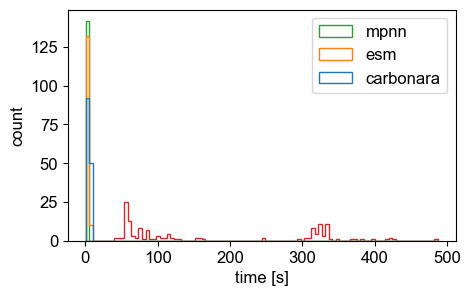

In [5]:
plt.figure(figsize=(5,3))
plt.hist(dfp.values, bins=100, histtype='step', label=['carbonara', 'esm', 'mpnn'])
plt.legend(loc='best')
plt.xlabel('time [s]')
plt.ylabel('count')
plt.show()

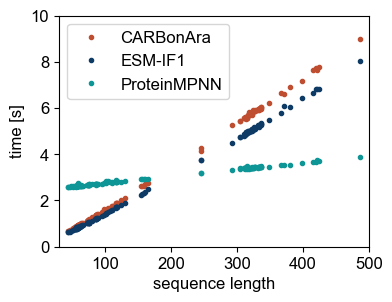

In [11]:
labels = ["CARBonAra", "ESM-IF1", "ProteinMPNN"]

x = dfp['seq_len'].values
Y = dfp[['carbonara', 'esm', 'mpnn']].values

plt.figure(figsize=(4,3))
for i in range(Y.shape[1]):
    plt.plot(x, Y[:,i], '.', label=labels[i], color=colors[i])
plt.legend(loc='best')
plt.ylabel('time [s]')
plt.xlabel('sequence length')
plt.xlim(30.0, 500.0)
plt.ylim(0.0, 10.0)
plt.show()